In [50]:
#importing python libraries and modules

#libraries & modules
import numpy as np #library for scientific computing
import pandas as pd #library for dataframes 
import matplotlib.pyplot as plt #graphic library
import seaborn as sns #advanced graphic library based on matplotlib
import warnings #library to manage warnings
import scipy #library with algorithms for statistics and scientific computing
from sklearn.tree import DecisionTreeClassifier #classification algorithm
from sklearn.neighbors import KNeighborsClassifier #classification algorith
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV #optimization parameter algorithm
from sklearn.model_selection import cross_val_score #cross validation algorithm
from sklearn.model_selection import train_test_split #train test split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix #metrics tool
from sklearn.metrics import classification_report #metrics tool
from sklearn.preprocessing import StandardScaler #feature engineering tool
import category_encoders as ce #one hot encoding tool
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

warnings.filterwarnings('ignore')

### EDA (Exploratory Data Analysis)

- we obtain a dataset from UCI (https://archive.ics.uci.edu/ml/index.php)
- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker 
- The prediction task is to determine whether a person makes over $50K a year.

In [51]:
#importing dataset

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
         'occupation', 'relationship', 'race','sex','capital-gain',
         'capital-loss','hours-per-week','native-country','salary']
df_census = pd.read_csv('adult.data', names=names) 

#### Dataset Explanation

1. age: continuous.
1. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
1. fnlwgt (Final weight): continuous. It is the number of people the census believes the entry represents.
1. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
1. education-num: continous. It is the number of years spent in education. 
1. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
1. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
1. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
1. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
1. sex: Female, Male.
1. capital-gain: continuous.
1. capital-loss: continuous.
1. hours-per-week: continuous.
1. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
1. salary: If it is above 50k USD or equal or below 

In [52]:
#dataset information

print(df_census.head(3).transpose(),"\n")
print(df_census.info(null_counts=True))
print(df_census.describe().transpose())

                             0                    1                   2
age                         39                   50                  38
workclass            State-gov     Self-emp-not-inc             Private
fnlwgt                   77516                83311              215646
education            Bachelors            Bachelors             HS-grad
education-num               13                   13                   9
marital-status   Never-married   Married-civ-spouse            Divorced
occupation        Adm-clerical      Exec-managerial   Handlers-cleaners
relationship     Not-in-family              Husband       Not-in-family
race                     White                White               White
sex                       Male                 Male                Male
capital-gain              2174                    0                   0
capital-loss                 0                    0                   0
hours-per-week              40                   13             

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64
 <=50K    24720
 >50K      7841
Name: salary, dtype: int64


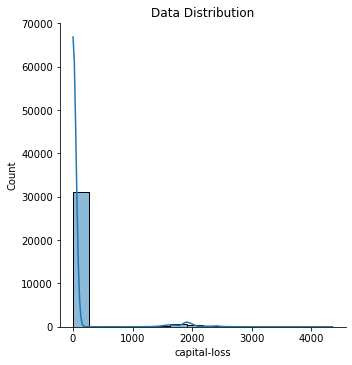

In [53]:
#I have use this code to explore this dataframe
print(df_census['capital-loss'].value_counts())

fig1 = sns.displot(x=df_census['capital-loss'], kde=True)
fig1.set(title='Data Distribution', xlabel='capital-loss', ylabel='Count')

print(df_census['salary'].value_counts())

#### Conclusions:
- The dataset does not contain any NaN data.
- There are 9 categorical and 6 numerical features
- The column 'salary' is the dependant variable, the column we have to classify
- Class data is 24720 for below 50K and 7841 for above 50K. It is slightly imbalanced (aprox 1:3), so at the moment will use this data as that, if we want to improve results we can try to balance data.
- The column 'fnlwgt' does not give any useful information and does not have normal distribution.
- The column 'capital-loss' and 'capital-gain', almost all values are 0 and its distribution is not normal.

### Exercici 1 (Nivell 1)
#### Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

- first we build a prototype machine learning model on the exisiting data before we create a pipeline



In [311]:
#adding a new column 'Over 50K' for classes
df_census.loc[df_census['salary'].str.contains('<=50K'), 'Over_50K'] = 1
df_census.loc[df_census['salary'].str.contains(">50K"), 'Over_50K'] = 0

#deleting features that are not important
columns_del = ['fnlwgt','capital-gain', 'capital-loss','salary']
df_census.drop(columns=columns_del, inplace=True)

#if we want to balance data
#we wil apply the method sample disproportionate to each stratum
#sample_stratum = 7841
#df_census = df_census.groupby('Over_50K', group_keys=False).apply(lambda x: x.sample(sample_stratum))

In [312]:
#pre-processing

#feature engineering: one-hot encoding
#selecting categorical features
columns_1 = ['workclass','education','marital-status',
             'occupation','relationship','race','sex','native-country']
#creating instance and applying to features
OHE = ce.OneHotEncoder(cols = columns_1,use_cat_names=True)
df_census_1 = OHE.fit_transform(df_census)


#feature engineering: standardization, as we assume Gaussian distribution
#selecting features to standardize
columns_2 = ['age','education-num','hours-per-week']
#creating instance and applying scalar
scaler = StandardScaler()
df_census_2 = df_census_1[columns_2].copy()
columns_sd = scaler.fit_transform(df_census_1[columns_2])
df_census_2[columns_2] = columns_sd

df_census_ok = pd.concat([df_census_1, df_census_2], axis=1)

In [313]:
#selecting variables X (aka predictors, independent or feature)
#selecting variable y (aka target or dependant)

X = df_census_ok.drop(columns=['Over_50K'])
y = df_census_ok['Over_50K']

#splitting in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

In [314]:
#model Random Forest Classifier
model_name = 'Random Forest Classifier'
model = RandomForestClassifier().fit(X_train, y_train)

#we obtain predicted values from test data
y_pred = model.predict(X_test)

#Accuracy
acc = round(metrics.accuracy_score(y_test, y_pred),3)

#Confusion Matrix
confMatrix = confusion_matrix(y_test, y_pred)

TN = confMatrix[0,0]
TP = confMatrix[1,1]
FN = confMatrix[1,0]
FP = confMatrix[0,1]

#Other metrics
target_names = ['Below 50K (0)', 'Over 50K (1)']
classReport = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

pre = round(classReport['Over 50K (1)'].get('precision'),3)
sen = round(classReport['Over 50K (1)'].get('recall'),3)
f1s = round(classReport['Over 50K (1)'].get('f1-score'),3)
spe = round(classReport['Below 50K (0)'].get('recall'),3)

| {{model_name}} | Predicted (Below 50K) | Predicted (Over 50K) | 
| ----------- | ----------- | ----------- |
| Actual (Below 50K) | TN | FP |  
| Actual (Over 50K) | FN | TP |  


| {{model_name}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN}} | {{FP}} |  
| Actual (1) | {{FN}} | {{TP}} |  

| model_name | Accuracy | Precision | F1 Score | Sensitivity | Specifity | 
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | 
| {{model}} | {{acc}} | {{pre}} | {{f1s}} | {{sen}} | {{spe}} | 


In [315]:
#we apply GridSearch to find the best parameters

#Random forest estimator
model_est = RandomForestClassifier()

#default parameters
print(model_est.get_params())

#selection of parameters and creating a dict for grid tool
n_estimators = [100, 300, 500]
max_depth = [5, 8, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
             min_samples_split = min_samples_split, 
            min_samples_leaf = min_samples_leaf)

model_grid = GridSearchCV(estimator=model_est, 
                          param_grid=hyperF, n_jobs = -1)

model_hyper = model_grid.fit(X_train, y_train)
print('\nBest Parameters:\n ', model_hyper.best_params_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


According to GridSearch algorithm, the best parameters for this algorithm are:
- max_depth: 15
- min_samples_leaf: 1
- min_samples_split: 10 
- n_estimators: 500

Once we know the ML structure we can make the pipeline

In [316]:
#pre-processsing step
#dropping columns
#one-hot encoding
#scaling data

columns_drop = ['fnlwgt','capital-gain','capital-loss','salary']
columns_scale = ['age','education-num','hours-per-week']
columns_ohe = ['workclass','education','marital-status',
             'occupation','relationship','race','sex','native-country']

transformers=[('drop_columns', 'drop', columns_drop), 
              ('scale_data', StandardScaler(), columns_scale),
              ('categorical transformer', ce.OneHotEncoder(), columns_ohe)]

pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=transformers)

In [317]:
steps = [('pre-processing', pre_process), 
         ('RandomForest', RandomForestClassifier())]

#creating pipeline object
model_pipeline = Pipeline(steps) 

In [318]:
#importing dataset

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
         'occupation', 'relationship', 'race','sex','capital-gain',
         'capital-loss','hours-per-week','native-country','salary']
df_census_pln = pd.read_csv('adult.data', names=names) 

#adding a new column 'Over 50K' for classes
df_census_pln.loc[df_census_pln['salary'].str.contains('<=50K'), 'Over_50K'] = 1
df_census_pln.loc[df_census_pln['salary'].str.contains('>50K'), 'Over_50K'] = 0

In [319]:
X = df_census_pln.drop(columns=['Over_50K'])
y = df_census_pln['Over_50K']

#splitting in train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                    test_size=0.3, random_state=42)

model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('pre-processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['fnlwgt', 'capital-gain',
                                                   'capital-loss', 'salary']),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  ['age', 'education-num',
                                                   'hours-per-week']),
                                                 ('categorical transformer',
                                                  OneHotEncoder(),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                          

In [320]:
#we obtain predicted values from test data
y_pred = model_pipeline.predict(X_test)

#Accuracy
acc = round(metrics.accuracy_score(y_test, y_pred),3)

#Confusion Matrix
confMatrix = confusion_matrix(y_test, y_pred)

TN = confMatrix[0,0]
TP = confMatrix[1,1]
FN = confMatrix[1,0]
FP = confMatrix[0,1]

#Other metrics
target_names = ['Below 50K (0)', 'Over 50K (1)']
classReport = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

pre = round(classReport['Over 50K (1)'].get('precision'),3)
sen = round(classReport['Over 50K (1)'].get('recall'),3)
f1s = round(classReport['Over 50K (1)'].get('f1-score'),3)
spe = round(classReport['Below 50K (0)'].get('recall'),3)

| {{model_name}} | Predicted (Below 50K) | Predicted (Over 50K) | 
| ----------- | ----------- | ----------- |
| Actual (Below 50K) | TN | FP |  
| Actual (Over 50K) | FN | TP |  


| {{model_name}} | Predicted (0) | Predicted (1) | 
| ----------- | ----------- | ----------- |
| Actual (0) | {{TN}} | {{FP}} |  
| Actual (1) | {{FN}} | {{TP}} |  

| model_name | Accuracy | Precision | F1 Score | Sensitivity | Specifity | 
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | 
| {{model}} | {{acc}} | {{pre}} | {{f1s}} | {{sen}} | {{spe}} | 

In [321]:
#applying gridsearch

n_estimators = [100, 300, 500]
max_depth = [5, 8, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5]

hyperF = dict(RandomForest__n_estimators = n_estimators,
              RandomForest__max_depth = max_depth,
              RandomForest__min_samples_split = min_samples_split,
              RandomForest__min_samples_leaf = min_samples_leaf)

model_grid = GridSearchCV(model_pipeline, param_grid=hyperF)

model_hyper = model_grid.fit(X_train, y_train)

print(model_hyper.best_params_)


{'RandomForest__max_depth': 15, 'RandomForest__min_samples_leaf': 1, 'RandomForest__min_samples_split': 2, 'RandomForest__n_estimators': 500}


According to GridSearch algorithm, the best parameters for this algorithm are:
- max_depth: 15
- min_samples_leaf: 1
- min_samples_split: 2 
- n_estimators: 500

### Exercici 2 (Nivell 1)
#### Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

In [47]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt 

<FreqDist with 185 samples and 351 outcomes>
[(',', 26), ('the', 18), ('.', 15), ('of', 12), ('and', 11), ('in', 8), ('to', 8), ('a', 7), ('that', 5), ('have', 5), ('environment', 5), ('as', 5), ('can', 5), ('are', 4), ('many', 3), ('planet', 3), ('natural', 3), ('on', 3), ('into', 3), ('not', 3), ('pollution', 3), ('their', 3), ('effects', 3), ('In', 2), ('our', 2), ('modern', 2), ('world', 2), ('factors', 2), ('place', 2), ('While', 2)]


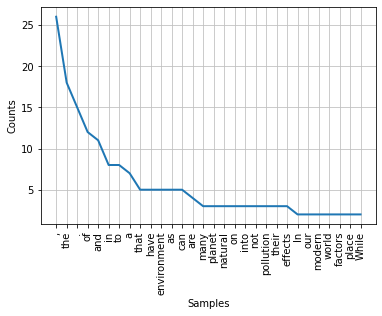

In [48]:
#text from (https://lingua.com/english/reading/#exercises)

text="""In our modern world, there are many factors that place the wellbeing of the planet in jeopardy. While some people have the opinion that environmental problems are just a natural occurrence, others believe that human beings have a huge impact on the environment. Regardless of your viewpoint, take into consideration the following factors that place our environment as well as the planet Earth in danger.
Global warming or climate change is a major contributing factor to environmental damage. Because of global warming, we have seen an increase in melting ice caps, a rise in sea levels, and the formation of new weather patterns. These weather patterns have caused stronger storms, droughts, and flooding in places that they formerly did not occur.
Air pollution is primarily caused as a result of excessive and unregulated emissions of carbon dioxide into the air. Pollutants mostly emerge from the burning of fossil fuels in addition to chemicals, toxic substances, and improper waste disposal. Air pollutants are absorbed into the atmosphere, and they can cause smog, a combination of smoke and fog, in valleys as well as produce acidic precipitation in areas far away from the pollution source.
In many areas, people and local governments do not sustainably use their natural resources. Mining for natural gases, deforestation, and even improper use of water resources can have tremendous effects on the environment. While these strategies often attempt to boost local economies, their effects can lead to oil spills, interrupted animal habitats, and droughts.
Ultimately, the effects of the modern world on the environment can lead to many problems. Human beings need to consider the repercussions of their actions, trying to reduce, reuse, and recycle materials while establishing environmentally sustainable habits. If measures are not taken to protect the environment, we can potentially witness the extinction of more endangered species, worldwide pollution, and a completely uninhabitable planet."""

#first we split the text in words
tokenized_word=word_tokenize(text)

#now we calculate frequency of words
fdist = FreqDist(tokenized_word)
print(fdist)

#5 most common words
print(fdist.most_common(30))

#plotting word distribution
fdist.plot(30,cumulative=False)
plt.show()

### Exercici 1 (Nivell 2)
#### Treu les stopwords i realitza stemming al teu conjunt de dades.

In [40]:
#removing stopwords

from nltk.corpus import stopwords

#we create a filter with stopwords in english
stop_words=set(stopwords.words("english"))
#print(stop_words)

#we tokenized text in sentences
tokenized_word=word_tokenize(text)
#print(tokenized_word)

#we create a list to keep text without stopwords
filtered_word=[]
stop_words_detected=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)
    else:
        stop_words_detected.append(w)
    
#we join the words    
text_stopwords = ' '.join(filtered_word)
   
print("Text without stopwords:\n",text_stopwords)
print("\nStop words detected:\n",stop_words_detected)

#stemming

from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

text_stemmed = ' '.join(stemmed_words)
print("\nStemmed Text:\n",text_stemmed)

Text without stopwords:
 In modern world , many factors place wellbeing planet jeopardy . While people opinion environmental problems natural occurrence , others believe human beings huge impact environment . Regardless viewpoint , take consideration following factors place environment well planet Earth danger . Global warming climate change major contributing factor environmental damage . Because global warming , seen increase melting ice caps , rise sea levels , formation new weather patterns . These weather patterns caused stronger storms , droughts , flooding places formerly occur . Air pollution primarily caused result excessive unregulated emissions carbon dioxide air . Pollutants mostly emerge burning fossil fuels addition chemicals , toxic substances , improper waste disposal . Air pollutants absorbed atmosphere , cause smog , combination smoke fog , valleys well produce acidic precipitation areas far away pollution source . In many areas , people local governments sustainably 

### Exercici 1 (Nivell 3)
#### Realitza sentiment analysis al teu conjunt de dades.

I did not have enough time to finish this exercize :(

In [46]:
#lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_word:
    lemma_word = lem.lemmatize(w)
    lemma_words.append(lemma_word)
    
text_lemmatized = ' '.join(lemma_words)
print("\nStemmed Text:\n",text_lemmatized,"\n")

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',
                     ngram_range = (1,1),tokenizer = token.tokenize)
text_sentiment= cv.fit_transform(lemma_words)

#we will use the "Sentiment analysis of movies" from kaggle to train the model
data=pd.read_csv('train.tsv', sep='\t')

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',
                     ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size=0.3, random_state=1)

from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
#print(X_test)
#print(predicted)

#we obtain predicted values from text
#predicted = clf.predict(text_sentiment)
#print(text_sentiment)
#print(predicted)



Stemmed Text:
 In modern world , many factor place wellbeing planet jeopardy . While people opinion environmental problem natural occurrence , others believe human being huge impact environment . Regardless viewpoint , take consideration following factor place environment well planet Earth danger . Global warming climate change major contributing factor environmental damage . Because global warming , seen increase melting ice cap , rise sea level , formation new weather pattern . These weather pattern caused stronger storm , drought , flooding place formerly occur . Air pollution primarily caused result excessive unregulated emission carbon dioxide air . Pollutants mostly emerge burning fossil fuel addition chemical , toxic substance , improper waste disposal . Air pollutant absorbed atmosphere , cause smog , combination smoke fog , valley well produce acidic precipitation area far away pollution source . In many area , people local government sustainably use natural resource . Mining